<a href="https://colab.research.google.com/github/1205apd/Tensorflow2.0/blob/main/Fashion_mnist_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [11]:
train_images[0,23,23]

194

In [12]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
class_names=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

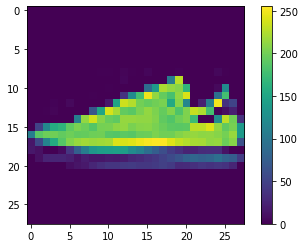

In [16]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

# DATA PREPROCESSING

In [17]:
train_images=train_images/255.0
test_images=test_images/255.0

In [18]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), #input layer
                        keras.layers.Dense(128,activation='relu'), #hidden layer
                        keras.layers.Dense(10,activation='softmax')]) #output layer

flatten does 28*28 is flattened

relu(rectified linear unit) activation is used for hidden layer
softmax either 0 or 1 activation is used for output layer.
10 is used as output layers has the number of classes as the value

# compile the  model

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# training the model

In [24]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2276 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9165
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2158 - accuracy: 0.9191
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2093 - accuracy: 0.9214
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2056 - accuracy: 0.9224


# evaluate the model

In [25]:
test_loss, test_acc=model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8850


In [29]:
print("loss is %.2f"%(test_loss*100))
print("accuracy is %.2f"%(test_acc*100))

loss is 33.89
accuracy is 88.50


# Predict the model

In [30]:
predictions=model.predict([test_images])

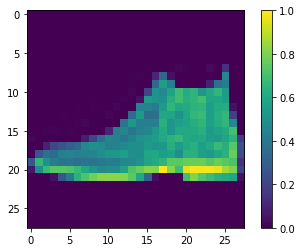

Ankle boot


In [40]:
plt.imshow(test_images[0])
plt.colorbar()
plt.show()
print(class_names[np.argmax(predictions[0])])

# VERIFYING OUR MODEL

enter a number: 4


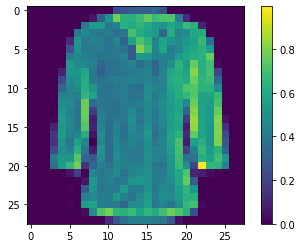

Shirt


In [50]:
a=int(input("enter a number: "))
plt.imshow(test_images[a])
plt.colorbar()
plt.show()
print(class_names[np.argmax(predictions[a])])